In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [21]:
df=pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

In [22]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


* No nulls
* 200 rows
* convert gender to numerical through label encoding

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


<Axes: xlabel='Gender', ylabel='Spending Score (1-100)'>

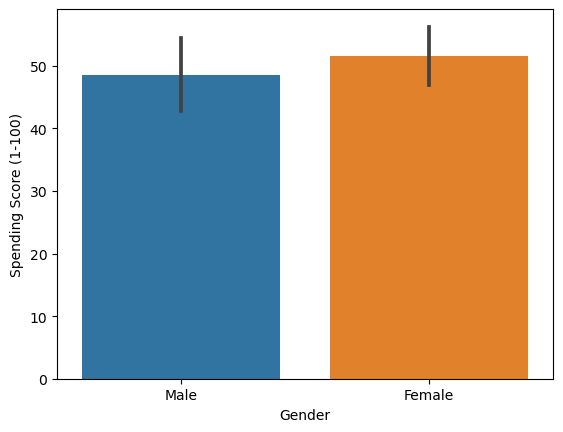

In [24]:
sns.barplot(x='Gender',y='Spending Score (1-100)',data=df)

* Spending habits for both male and female isnt that much distinct

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

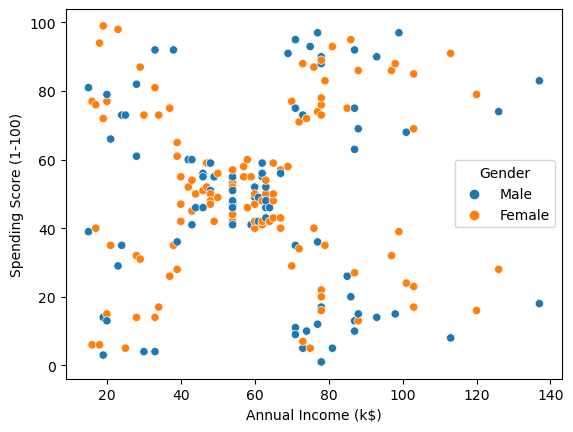

In [25]:
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df,hue='Gender')

In [26]:
from sklearn.preprocessing import LabelEncoder

# Initialize the OneHotEncoder object
encoder = LabelEncoder()

# Fit and transform the data to perform one-hot encoding
df['Gender'] = encoder.fit_transform(df['Gender'])

In [27]:
df=df.drop('CustomerID',axis=1)

In [28]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=5)

In [29]:
km.fit(df)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [30]:
km.cluster_centers_

array([[ 0.39130435, 25.52173913, 26.30434783, 78.56521739],
       [ 0.52777778, 40.66666667, 87.75      , 17.58333333],
       [ 0.41772152, 43.08860759, 55.29113924, 49.56962025],
       [ 0.39130435, 45.2173913 , 26.30434783, 20.91304348],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513]])

In [31]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(df, km.labels_)
print("Silhouette Score:", silhouette_avg)
##the closer the score is to 1,the better the perfomance

Silhouette Score: 0.4440669204743008
